In [1]:
# default_exp onehot

In [2]:
# all_func

In [1]:
#hide

from nbdev.showdoc import *

# Onehot Encoding

> Functions to create baseline results with ML models on one hot encoded data.

In [1]:
# export

from peptide.imports import *
from peptide.basics import *
from peptide.core import *
from peptide.data import (
    ProteinDataset,
    ACPDataset,
    AMPDataset,
    DNABindDataset,
)

## Load data

In [2]:
acp_data = ACPDataset(DATA_STORE)
amp_data = AMPDataset(DATA_STORE)
dna_data = DNABindDataset(DATA_STORE)

In [6]:
amp_data.train.head(5)

,index,sequence,label,length
0,3,FFGRLKAVFRGARQGWKEHRY,1,21
1,4,DFGCARGMIFVCMRRCARMYPGSTGYCQGFRCMCDTMIPIRRPPFIMG,1,48
2,5,GRRKRKWLRRIGKGVKIIGGAALDHL,1,26
3,6,LLMRKLIKGYGYLFGKGKRKKR,1,22
4,7,LIDHLGAPRWAVDTILGAIAVGNLASWVLALVPGPGWAVKAGLATA...,1,61


In [7]:
amp_data.test.head(5)


,index,sequence,label,length
0,2629,SVVHQDVGGKDYTTKYGL,0,18
1,1102,FKFGSFIKRMWRSKLAKKLRAKGKELLRDYANRVLSPEEEAAAPAPYPA,1,49
2,946,GWFKKTFHKVSHAVKSGIHAGQRGCSALGF,1,30
3,118,GIFSSRKCKTVSKTFRGICTRNANC,1,25
4,326,FMGGLIKAATKIVPAAYCAITKKC,1,24


In [8]:
amp_data.train["length"].max(), amp_data.test["length"].max()


(183, 171)

In [9]:
amp_data.X_train.shape[1], amp_data.X_test.shape[1]


(150, 150)

## OHE and PCA on AMP Dataset

### One Hot Encoding (on AMP Dataset)

In [4]:
amp_data.X_train.shape, amp_data.X_test.shape

((3234, 150), (808, 150))

In [5]:
ohe = OneHotEncoder(handle_unknown="ignore", sparse=False)

X_train = ohe.fit_transform(amp_data.X_train)
y_train = amp_data.y_train

In [6]:
X_test = ohe.transform(amp_data.X_test)
y_test = amp_data.y_test

In [7]:
X_train.shape, y_train.shape, X_test.shape, y_test.shape


((3234, 2772), (3234,), (808, 2772), (808,))

### Dimensionality Reduction - PCA (on AMP Dataset)

In [8]:
pca = PCA(n_components=50)

In [9]:
X_train_pca = pca.fit_transform(X_train)

In [10]:
X_train_pca.shape

(3234, 50)

In [11]:
print(
    f"Explained variance ratio of the first 10 principal components:\n{pca.explained_variance_ratio_[:10]}"
)


Explained variance ratio of the first 10 principal components:
[0.13843282 0.047556   0.02220828 0.01353615 0.00920877 0.00810649
 0.00658269 0.00641526 0.00495087 0.00445507]


#### Visualize

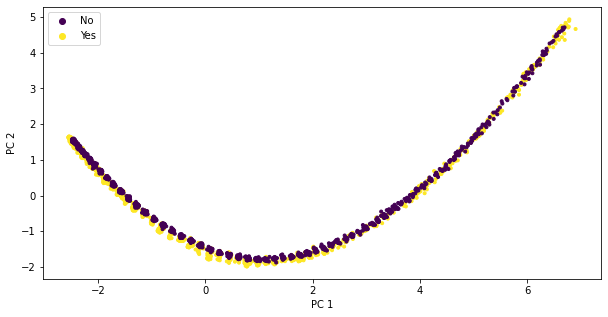

In [12]:
visualize_2pcs(X_train_pca, y_train)

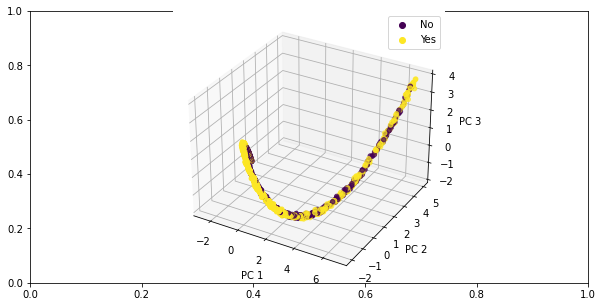

In [13]:
visualize_3pcs(X_train_pca, y_train)

#### Train Classifiers & Predict

On full data

In [14]:
train_predict(X_train, y_train, X_test, y_test)

,acc,recall,precision,f1
lr,0.861386,0.848866,0.866324,0.857506
svc,0.820545,0.813602,0.819797,0.816688
xgb,0.875000,0.846348,0.893617,0.869340


On Dim Reduced Data

In [15]:
X_test_pca = pca.transform(X_test)
train_predict(X_train_pca, y_train, X_test_pca, y_test)

,acc,recall,precision,f1
lr,0.831683,0.816121,0.837209,0.826531
svc,0.832921,0.811083,0.842932,0.826701
xgb,0.857673,0.780856,0.917160,0.843537


## OHE and PCA on ACP Dataset

In [16]:
ohe = OneHotEncoder(handle_unknown="ignore", sparse=False)

X_train = ohe.fit_transform(acp_data.X_train)
y_train = acp_data.y_train
X_test = ohe.transform(acp_data.X_test)
y_test = acp_data.y_test
X_train.shape, y_train.shape, X_test.shape, y_test.shape

((1378, 1005), (1378,), (344, 1005), (344,))

In [17]:
pca = PCA(n_components=50)
X_train_pca = pca.fit_transform(X_train)
print(f'X_train_pca.shape: {X_train_pca.shape}')
print(
    f"Explained variance ratio of the first 10 principal components:\n{pca.explained_variance_ratio_[:10]}"
)

X_train_pca.shape: (1378, 50)
Explained variance ratio of the first 10 principal components:
[0.1410507  0.0416239  0.02109974 0.01722044 0.01636225 0.01540608
 0.01202852 0.01169151 0.01045003 0.00951477]


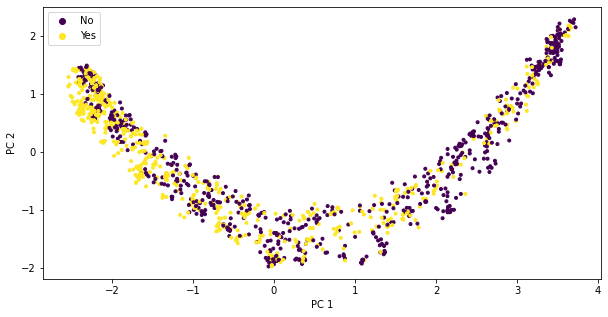

In [18]:
visualize_2pcs(X_train_pca, y_train)

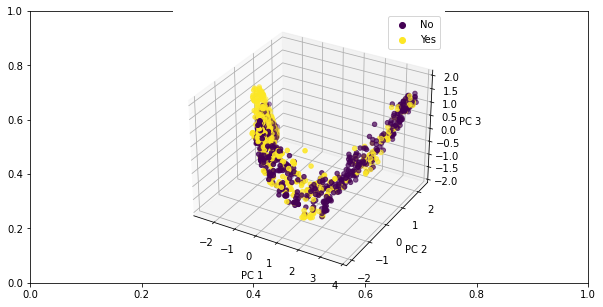

In [19]:
visualize_3pcs(X_train_pca, y_train)

Evaluation on full data

In [20]:
train_predict(X_train, y_train, X_test, y_test)

,acc,recall,precision,f1
lr,0.747093,0.790698,0.727273,0.757660
svc,0.697674,0.720930,0.688889,0.704545
xgb,0.755814,0.819767,0.726804,0.770492


Evaluation on reduced data

In [21]:
X_test_pca = pca.transform(X_test)
train_predict(X_train_pca, y_train, X_test_pca, y_test)

,acc,recall,precision,f1
lr,0.654070,0.715116,0.637306,0.673973
svc,0.645349,0.709302,0.628866,0.666667
xgb,0.732558,0.755814,0.722222,0.738636


## OHE and PCA on DNA Binding Dataset

In [22]:
ohe = OneHotEncoder(handle_unknown="ignore", sparse=False)

X_train = ohe.fit_transform(dna_data.X_train)
y_train = dna_data.y_train
X_test = ohe.transform(dna_data.X_test)
y_test = dna_data.y_test
X_train.shape, y_train.shape, X_test.shape, y_test.shape

((14189, 6331), (14189,), (2272, 6331), (2272,))

In [23]:
pca = PCA(n_components=50)
X_train_pca = pca.fit_transform(X_train)
print(f'X_train_pca.shape: {X_train_pca.shape}')
print(
    f"Explained variance ratio of the first 10 principal components:\n{pca.explained_variance_ratio_[:10]}"
)

X_train_pca.shape: (14189, 50)
Explained variance ratio of the first 10 principal components:
[0.11000307 0.01718686 0.00664696 0.00364568 0.00224708 0.00211335
 0.00165068 0.00159829 0.00131059 0.00122739]


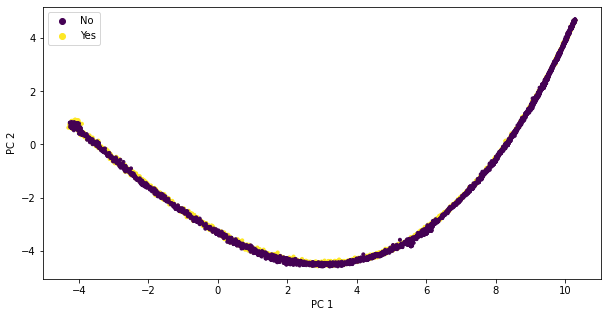

In [24]:
visualize_2pcs(X_train_pca, y_train)

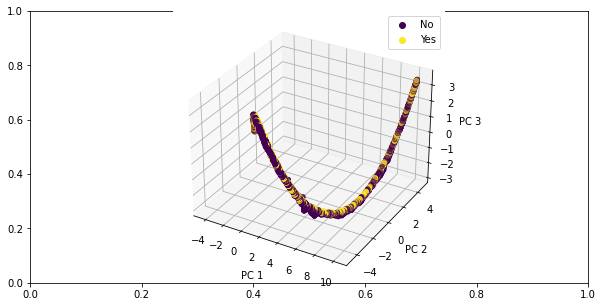

In [25]:
visualize_3pcs(X_train_pca, y_train)

Evaluation on full data

In [26]:
train_predict(X_train, y_train, X_test, y_test)

,acc,recall,precision,f1
lr,0.745158,0.903729,0.690066,0.782576
svc,0.744278,0.927147,0.682631,0.786318
xgb,0.745599,0.883781,0.696514,0.779052


Evaluation on reduced data

In [27]:
X_test_pca = pca.transform(X_test)
train_predict(X_train_pca, y_train, X_test_pca, y_test)

,acc,recall,precision,f1
lr,0.634243,0.588899,0.655405,0.620375
svc,0.631602,0.575022,0.656436,0.613037
xgb,0.710827,0.889853,0.659383,0.757475


## Grid Search

### ACP Dataset

In [28]:
acp_learner = Learner(acp_data, ohe=True, pca=False)

In [29]:
acp_learner.pipeline.steps

[('ohe', OneHotEncoder(handle_unknown='ignore', sparse=False)),
 ('classifier', 'passthrough')]

In [30]:
#hide_output

_, _ = acp_learner.train()

Starting grid search for LogisticRegression
Fitting 3 folds for each of 45 candidates, totalling 135 fits
Starting grid search for LinearSVC
Fitting 3 folds for each of 30 candidates, totalling 90 fits


/home/vinod/anaconda3/envs/peptide/lib/python3.9/site-packages/sklearn/svm/_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/home/vinod/anaconda3/envs/peptide/lib/python3.9/site-packages/sklearn/svm/_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/home/vinod/anaconda3/envs/peptide/lib/python3.9/site-packages/sklearn/svm/_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/home/vinod/anaconda3/envs/peptide/lib/python3.9/site-packages/sklearn/svm/_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/home/vinod/anaconda3/envs/peptide/lib/python3.9/site-packages/sklearn/svm/_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/home/vinod/anaconda3/envs/peptide/lib/p

Starting grid search for XGBClassifier
Fitting 3 folds for each of 32 candidates, totalling 96 fits


In [31]:
acp_learner_pca = Learner(acp_data, ohe=True, pca=True)

In [32]:
#hide_output

_, _ = acp_learner_pca.train()

Starting grid search for LogisticRegression
Fitting 3 folds for each of 45 candidates, totalling 135 fits
Starting grid search for LinearSVC
Fitting 3 folds for each of 30 candidates, totalling 90 fits


/home/vinod/anaconda3/envs/peptide/lib/python3.9/site-packages/sklearn/svm/_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/home/vinod/anaconda3/envs/peptide/lib/python3.9/site-packages/sklearn/svm/_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/home/vinod/anaconda3/envs/peptide/lib/python3.9/site-packages/sklearn/svm/_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/home/vinod/anaconda3/envs/peptide/lib/python3.9/site-packages/sklearn/svm/_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/home/vinod/anaconda3/envs/peptide/lib/python3.9/site-packages/sklearn/svm/_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/home/vinod/anaconda3/envs/peptide/lib/p

Starting grid search for XGBClassifier
Fitting 3 folds for each of 32 candidates, totalling 96 fits


#### Results

In [33]:
acp_learner.predict()

,classifier,best_params,accuracy,recall,precision,f1
0,LogisticRegression,{'classifier': LogisticRegression(max_iter=100...,0.752907,0.808140,0.727749,0.765840
1,LinearSVC,"{'classifier': LinearSVC(C=0.01, max_iter=1000...",0.723837,0.779070,0.701571,0.738292
2,XGBClassifier,"{'classifier': XGBClassifier(base_score=None, ...",0.758721,0.819767,0.730570,0.772603


In [34]:
acp_learner_pca.predict()

,classifier,best_params,accuracy,recall,precision,f1
0,LogisticRegression,"{'classifier': LogisticRegression(C=100.0, max...",0.645349,0.715116,0.627551,0.668478
1,LinearSVC,"{'classifier': LinearSVC(C=10.0, loss='hinge',...",0.639535,0.715116,0.621212,0.664865
2,XGBClassifier,"{'classifier': XGBClassifier(base_score=None, ...",0.718023,0.750000,0.704918,0.726761


### AMP Dataset

In [35]:
amp_learner = Learner(amp_data, ohe=True, pca=False)

In [36]:
#hide_output

_, _ = amp_learner.train()

Starting grid search for LogisticRegression
Fitting 3 folds for each of 45 candidates, totalling 135 fits
Starting grid search for LinearSVC
Fitting 3 folds for each of 30 candidates, totalling 90 fits


/home/vinod/anaconda3/envs/peptide/lib/python3.9/site-packages/sklearn/svm/_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/home/vinod/anaconda3/envs/peptide/lib/python3.9/site-packages/sklearn/svm/_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/home/vinod/anaconda3/envs/peptide/lib/python3.9/site-packages/sklearn/svm/_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/home/vinod/anaconda3/envs/peptide/lib/python3.9/site-packages/sklearn/svm/_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/home/vinod/anaconda3/envs/peptide/lib/python3.9/site-packages/sklearn/svm/_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/home/vinod/anaconda3/envs/peptide/lib/p

Starting grid search for XGBClassifier
Fitting 3 folds for each of 32 candidates, totalling 96 fits


In [37]:
amp_learner_pca = Learner(amp_data, ohe=True, pca=True)

In [38]:
#hide_output

_, _ = amp_learner_pca.train()

Starting grid search for LogisticRegression
Fitting 3 folds for each of 45 candidates, totalling 135 fits
Starting grid search for LinearSVC
Fitting 3 folds for each of 30 candidates, totalling 90 fits


/home/vinod/anaconda3/envs/peptide/lib/python3.9/site-packages/sklearn/svm/_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/home/vinod/anaconda3/envs/peptide/lib/python3.9/site-packages/sklearn/svm/_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/home/vinod/anaconda3/envs/peptide/lib/python3.9/site-packages/sklearn/svm/_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/home/vinod/anaconda3/envs/peptide/lib/python3.9/site-packages/sklearn/svm/_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/home/vinod/anaconda3/envs/peptide/lib/python3.9/site-packages/sklearn/svm/_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/home/vinod/anaconda3/envs/peptide/lib/p

Starting grid search for XGBClassifier
Fitting 3 folds for each of 32 candidates, totalling 96 fits


#### Results

In [39]:
amp_learner.predict()

,classifier,best_params,accuracy,recall,precision,f1
0,LogisticRegression,{'classifier': LogisticRegression(max_iter=100...,0.855198,0.823678,0.874332,0.848249
1,LinearSVC,"{'classifier': LinearSVC(C=0.1, max_iter=10000...",0.866337,0.846348,0.877285,0.861538
2,XGBClassifier,"{'classifier': XGBClassifier(base_score=None, ...",0.882426,0.858942,0.897368,0.877735


In [40]:
amp_learner_pca.predict()

,classifier,best_params,accuracy,recall,precision,f1
0,LogisticRegression,"{'classifier': LogisticRegression(C=100.0, max...",0.823020,0.811083,0.825641,0.818297
1,LinearSVC,"{'classifier': LinearSVC(C=100.0, loss='hinge'...",0.839109,0.833753,0.837975,0.835859
2,XGBClassifier,"{'classifier': XGBClassifier(base_score=None, ...",0.856436,0.775819,0.919403,0.841530


### DNA Binding Dataset

In [42]:
dna_learner = Learner(dna_data, ohe=True, pca=False)

In [43]:
#hide_output

_, _ = dna_learner.train()

Starting grid search for LogisticRegression
Fitting 3 folds for each of 45 candidates, totalling 135 fits


/home/vinod/anaconda3/envs/peptide/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/home/vinod/anaconda3/envs/peptide/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_

Starting grid search for LinearSVC
Fitting 3 folds for each of 30 candidates, totalling 90 fits


/home/vinod/anaconda3/envs/peptide/lib/python3.9/site-packages/sklearn/svm/_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/home/vinod/anaconda3/envs/peptide/lib/python3.9/site-packages/sklearn/svm/_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/home/vinod/anaconda3/envs/peptide/lib/python3.9/site-packages/sklearn/svm/_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/home/vinod/anaconda3/envs/peptide/lib/python3.9/site-packages/sklearn/svm/_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/home/vinod/anaconda3/envs/peptide/lib/python3.9/site-packages/sklearn/svm/_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/home/vinod/anaconda3/envs/peptide/lib/p

Starting grid search for XGBClassifier
Fitting 3 folds for each of 32 candidates, totalling 96 fits


In [ ]:
dna_learner_pca = Learner(dna_data, ohe=True, pca=True)

In [ ]:
#hide_output

_, _ = dna_learner_pca.train()

Starting grid search for LogisticRegression
Fitting 3 folds for each of 45 candidates, totalling 135 fits
Starting grid search for SVC
Fitting 3 folds for each of 24 candidates, totalling 72 fits
Starting grid search for XGBClassifier
Fitting 3 folds for each of 32 candidates, totalling 96 fits


#### Results

In [ ]:
dna_learner.predict()

,classifier,best_params,accuracy,recall,precision,f1
0,LogisticRegression,{'classifier': LogisticRegression(max_iter=100...,0.752907,0.808140,0.727749,0.765840
1,SVC,"{'classifier': SVC(C=10, kernel='poly', max_it...",0.752907,0.767442,0.745763,0.756447
2,XGBClassifier,"{'classifier': XGBClassifier(base_score=None, ...",0.758721,0.819767,0.730570,0.772603


In [ ]:
dna_learner_pca.predict()

,classifier,best_params,accuracy,recall,precision,f1
0,LogisticRegression,"{'classifier': LogisticRegression(C=10.0, max_...",0.633721,0.680233,0.622340,0.650000
1,SVC,"{'classifier': SVC(C=10, max_iter=20000), 'cla...",0.729651,0.744186,0.723164,0.733524
2,XGBClassifier,"{'classifier': XGBClassifier(base_score=None, ...",0.732558,0.761628,0.719780,0.740113


## Clustering

### ACP

#### Pick k

In [3]:
X_train, X_test = acp_data.X_train, acp_data.X_test
X = np.concatenate((X_train, X_test), axis=0)
assert (X_train.shape[0] + X_test.shape[0]) == X.shape[0]
X_train.shape, X_test.shape, X.shape

((1378, 50), (344, 50), (1722, 50))

In [4]:
ohe = OneHotEncoder(handle_unknown="ignore", sparse=False)

X_ohe = ohe.fit_transform(X)
X.shape, X_ohe.shape

((1722, 50), (1722, 1015))

In [5]:
pca = PCA(n_components=50)

X_pca = pca.fit_transform(X_ohe)
X_pca.shape

(1722, 50)

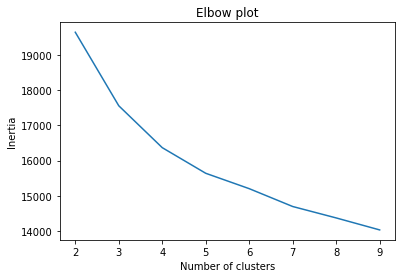

In [6]:
visualize_elbow(X_pca, np.arange(2, 10))

**k = 5?**

n_clusters: 2 -- avg silhouette score: 0.24178065879339763
n_clusters: 3 -- avg silhouette score: 0.17537324739669888
n_clusters: 4 -- avg silhouette score: 0.15620325058820664
n_clusters: 5 -- avg silhouette score: 0.13019185125599278
n_clusters: 6 -- avg silhouette score: 0.1095510164833076
n_clusters: 7 -- avg silhouette score: 0.10830221375355677
n_clusters: 8 -- avg silhouette score: 0.10594360337775252


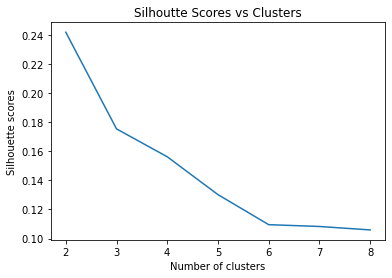

In [7]:
plot_silhouette_scores(max_clusters=8, X=X_pca)

**Picking k = 6**

#### Cluster Analysis

In [8]:
km = KMeans(n_clusters=6, random_state=10).fit(X_pca)

In [9]:
Counter(km.labels_)

Counter({5: 347, 0: 278, 4: 350, 3: 361, 1: 167, 2: 219})

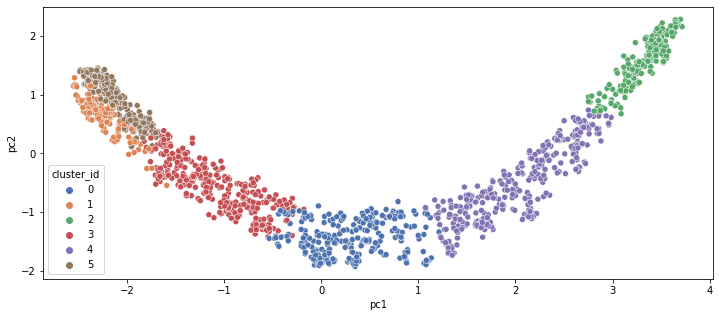

In [10]:
visualize_clusters(km.labels_, X_pca)

### AMP

#### Pick k

In [21]:
def pick_k(ds: ProteinDataset, max_clusters: int = 10) -> np.ndarray:
    """Visualize to help determine k for KMeans."""
    
    # concat X
    X_train, X_test = ds.X_train, ds.X_test
    X = np.concatenate((X_train, X_test), axis=0)
    assert (X_train.shape[0] + X_test.shape[0]) == X.shape[0]
    # print(X_train.shape, X_test.shape, X.shape)

    # One Hot Encode X
    ohe = OneHotEncoder(handle_unknown="ignore", sparse=False)
    X_ohe = ohe.fit_transform(X)
    # print(X.shape, X_ohe.shape)

    # Dim Reduce X
    pca = PCA(n_components=50)
    X_pca = pca.fit_transform(X_ohe)
    # print(X_pca.shape)

    # visualize elbow plot
    visualize_elbow(X_pca, np.arange(2, max_clusters))
    # visualize silhouette scores and plot
    plot_silhouette_scores(max_clusters=max_clusters, X=X_pca)
    
    return X_pca

n_clusters: 2 -- avg silhouette score: 0.32902463441027624
n_clusters: 3 -- avg silhouette score: 0.2628939640393654
n_clusters: 4 -- avg silhouette score: 0.22473996790048
n_clusters: 5 -- avg silhouette score: 0.21093643123593256
n_clusters: 6 -- avg silhouette score: 0.189432849043654
n_clusters: 7 -- avg silhouette score: 0.1676354799021241
n_clusters: 8 -- avg silhouette score: 0.1506045792288033
n_clusters: 9 -- avg silhouette score: 0.15118309074633993
n_clusters: 10 -- avg silhouette score: 0.16116418513420264


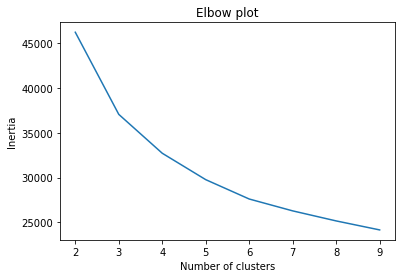

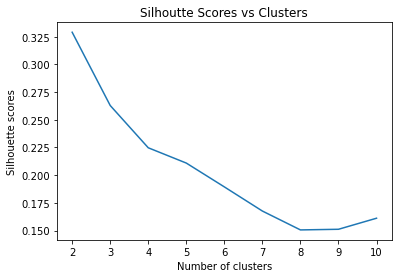

In [22]:
X_pca = pick_k(amp_data)

**k = 5?**

**Picking k = 5**

#### Cluster Analysis

In [25]:
def analyze_clusters(X: np.ndarray, k: int, random_state: int = 10) -> None:
    """Analyze clusters identified by KMeans"""
    km = KMeans(n_clusters=k, random_state=random_state).fit(X)
    print(f'Cluster counts: {Counter(km.labels_)}')
    visualize_clusters(km.labels_, X)

Cluster counts: Counter({1: 1414, 2: 1212, 4: 861, 0: 390, 3: 165})


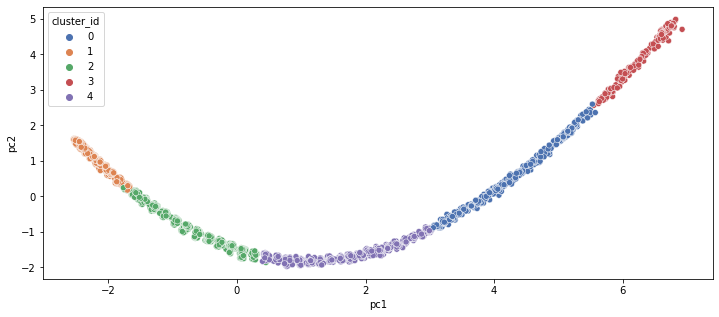

In [26]:
analyze_clusters(X_pca, 5)

### DNA Binding

n_clusters: 2 -- avg silhouette score: 0.5372813771741969
n_clusters: 3 -- avg silhouette score: 0.48525433634212917
n_clusters: 4 -- avg silhouette score: 0.44485495655986335
n_clusters: 5 -- avg silhouette score: 0.4178294162897144
n_clusters: 6 -- avg silhouette score: 0.37821810585939114
n_clusters: 7 -- avg silhouette score: 0.3604352493440644
n_clusters: 8 -- avg silhouette score: 0.32609949613777595
n_clusters: 9 -- avg silhouette score: 0.3233686572522286
n_clusters: 10 -- avg silhouette score: 0.15188107649749766


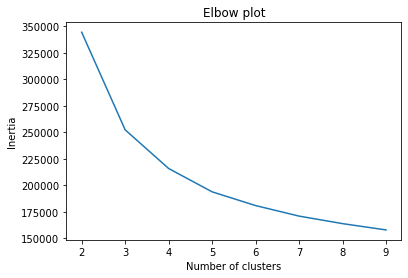

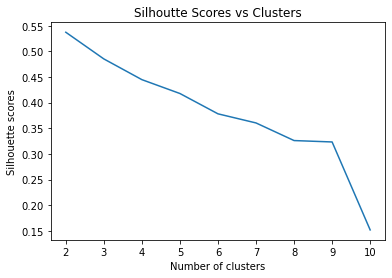

In [27]:
X_pca = pick_k(dna_data)

Cluster counts: Counter({1: 9302, 0: 1058, 4: 995, 6: 974, 8: 926, 5: 913, 7: 837, 3: 831, 2: 625})


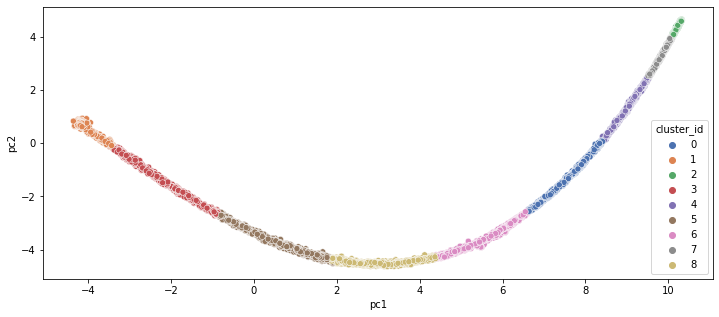

In [28]:
analyze_clusters(X_pca, 9)

## Label Spreading

### ACP

In [3]:
X_train, X_test = acp_data.X_train, acp_data.X_test
X = np.concatenate((X_train, X_test), axis=0)
assert (X_train.shape[0] + X_test.shape[0]) == X.shape[0]
X_train.shape, X_test.shape, X.shape

((1378, 50), (344, 50), (1722, 50))

In [4]:
y_train, y_test = acp_data.y_train, acp_data.y_test
y = np.concatenate((y_train, np.full(y_test.shape, -1)), axis=0)
assert (y_train.shape[0] + y_test.shape[0]) == y.shape[0]
y_train.shape, y_test.shape, y.shape

((1378,), (344,), (1722,))

In [5]:
ohe = OneHotEncoder(handle_unknown="ignore", sparse=False)

X_ohe = ohe.fit_transform(X)
X.shape, X_ohe.shape

((1722, 50), (1722, 1015))

In [6]:
pca = PCA(n_components=50)

X_pca = pca.fit_transform(X_ohe)
X_pca.shape

(1722, 50)

In [7]:
lbl_spread = LabelSpreading(kernel='knn', alpha=0.01)
lbl_spread.fit(X_pca, y)

LabelSpreading(alpha=0.01, kernel='knn')

In [8]:
semi_sup_preds = lbl_spread.transduction_[X_train.shape[0]:]

In [9]:
assert semi_sup_preds.shape[0] == X_test.shape[0]

In [10]:
print(classification_report(y_test, semi_sup_preds)) 

              precision    recall  f1-score   support

           0       0.73      0.67      0.70       172
           1       0.70      0.76      0.72       172

    accuracy                           0.71       344
   macro avg       0.71      0.71      0.71       344
weighted avg       0.71      0.71      0.71       344



### AMP

In [15]:
def run_label_spreading(ds: ProteinDataset) -> None:

    # concat X
    X_train, X_test = ds.X_train, ds.X_test
    X = np.concatenate((X_train, X_test), axis=0)
    assert (X_train.shape[0] + X_test.shape[0]) == X.shape[0]
    # print(X_train.shape, X_test.shape, X.shape)

    # concat y
    y_train, y_test = ds.y_train, ds.y_test
    y = np.concatenate((y_train, np.full(y_test.shape, -1)), axis=0)
    assert (y_train.shape[0] + y_test.shape[0]) == y.shape[0]
    # print(y_train.shape, y_test.shape, y.shape)

    # One Hot Encode X
    ohe = OneHotEncoder(handle_unknown="ignore", sparse=False)
    X_ohe = ohe.fit_transform(X)
    # print(X.shape, X_ohe.shape)

    # Dim Reduce X
    pca = PCA(n_components=50)
    X_pca = pca.fit_transform(X_ohe)
    # print(X_pca.shape)

    # Run LableSpreading
    lbl_spread = LabelSpreading(kernel='knn', alpha=0.01)
    lbl_spread.fit(X_pca, y)
    semi_sup_preds = lbl_spread.transduction_[X_train.shape[0]:]
    assert semi_sup_preds.shape[0] == X_test.shape[0]
    
    # print result
    print(classification_report(y_test, semi_sup_preds)) 

In [16]:
run_label_spreading((amp_data))

              precision    recall  f1-score   support

           0       0.76      0.93      0.84       411
           1       0.91      0.70      0.79       397

    accuracy                           0.82       808
   macro avg       0.84      0.82      0.82       808
weighted avg       0.84      0.82      0.82       808



### DNA Binding

In [17]:
run_label_spreading(dna_data)

              precision    recall  f1-score   support

           0       0.76      0.55      0.64      1119
           1       0.65      0.83      0.73      1153

    accuracy                           0.69      2272
   macro avg       0.71      0.69      0.68      2272
weighted avg       0.70      0.69      0.68      2272



## Export -

In [7]:
# hide
from nbdev.export import *

notebook2script()


Converted 00_basics.ipynb.
Converted 01_data.ipynb.
Converted 02_core.ipynb.
Converted 03_onehot.ipynb.
Converted 04_lstm.ipynb.
Converted 05_transformer.ipynb.
Converted index.ipynb.
